In [50]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Задание 1

In [51]:
def kMeansPlusPlus(k, data):
    n = len(data[:, 0])
    rand_index = random.randint(0, n - 1)
    centers = [(data[rand_index], rand_index)]
    while len(centers) != k:
        nearest_centers = np.array([0] * n)
        j = 0
        sum  = 0
        for point in data:
            nearest_ind = centers[0][1]
            min_dist = np.linalg.norm(point - centers[0][0])**2
            for i in range(len(centers)):
                if min_dist > np.linalg.norm(point - centers[i][0])**2:
                    min_dist = np.linalg.norm(point - centers[i][0])**2
                    nearest_ind = i
            sum += min_dist
            nearest_centers[j] = nearest_ind
            j += 1
        rand_num = random.random() * sum
        sum  = 0
        for j in range(n):
            point = data[j]
            nearest_ind = centers[0][1]
            min_dist = np.linalg.norm(point - centers[0][0])**2
            for i in range(len(centers)):
                if min_dist > np.linalg.norm(point - centers[i][0])**2:
                    min_dist = np.linalg.norm(point - centers[i][0])**2
                    nearest_ind = i
            sum += min_dist
            if sum > rand_num:
                centers.append((data[j], j))
                break
            nearest_centers[j] = nearest_ind
            j += 1
    return centers
        

def kMeans(k, data):
    n = len(data[:, 0])
    size = len(data[0])
    init_centers = kMeansPlusPlus(k, data)
    centers = []
    i = 0
    for elem in init_centers:
        centers.append((elem[0], i))
        i += 1
    classes = np.array([-1] * n)
    while True:
        for j in range(n):
            point = data[j]
            nearest_ind = centers[0][1]
            min_dist = np.linalg.norm(point - centers[0][0])**2
            for i in range(len(centers)):
                if min_dist > np.linalg.norm(point - centers[i][0])**2:
                    min_dist = np.linalg.norm(point - centers[i][0])**2
                    nearest_ind = centers[i][1]
            classes[j] = nearest_ind
        old_centers = centers
        for i in range(len(centers)):
            el = centers[i][1]
            q = 1
            sum = np.array([0] * size)
            for l in range(len(classes)):
                if classes[l] == el:
                    q += 1
                    sum = sum + data[l]
            centers[i] = (1 / q * sum, centers[i][1])
            
        if old_centers == centers:
            return classes, centers
    

def Dunn(classes, centers, data):
    min_dist = np.linalg.norm(centers[0][0] - centers[1][0])
    for x in centers:
        for y in centers:
            if x[1] != y[1] and np.linalg.norm(x[0] - y[0]) < min_dist:
                min_dist = np.linalg.norm(x[0] - y[0])
    max_dist = 0
    for i in range(len(classes)):
        for j in range(len(classes)):
            if classes[i] != classes[j] and \
                    np.linalg.norm(data[i] - data[j]) > max_dist:
                max_dist = np.linalg.norm(data[i] - data[j])
    return min_dist / max_dist


Number of clusters =  2


Dunn index =  0.36250632099929414


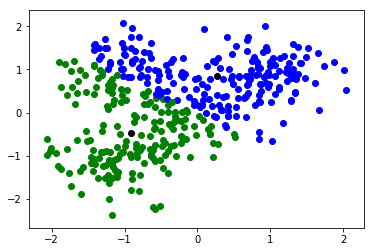

Number of clusters =  3


Dunn index =  0.34491060748761104


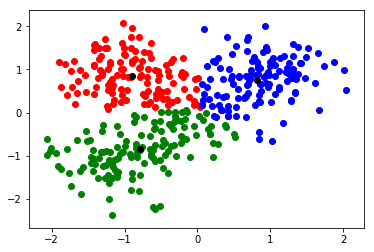

Number of clusters =  4


Dunn index =  0.25715178801120014


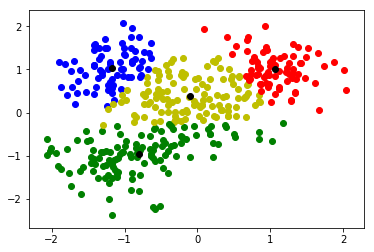

Number of clusters =  5


Dunn index =  0.20184082967439546


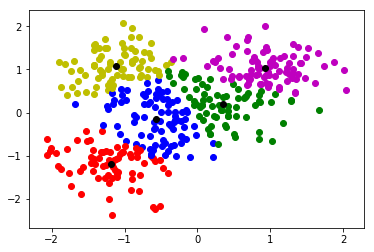

In [52]:
path = "/Users/user/PycharmProjects/MLHW1/blobs.csv"
data = np.array(pd.read_csv(path))
colors = ['b', 'g', 'r', 'y', 'm']
for i in range(2, 6):
    classes, centers = kMeans(i, data)
    print ("Number of clusters = ", i)
    print ("Dunn index = ", Dunn(classes, centers, data)) 
    fig = plt.figure()
    for j in range(len(classes)):
        plt.scatter(data[j][0], data[j][1], color=colors[classes[j]])
    for center in centers:
        plt.scatter(center[0][0], center[0][1], color='k')
    plt.show()

Задание 2

5
epsilon = 0.5
m = 5



Dunn index =  0.17484263677853612


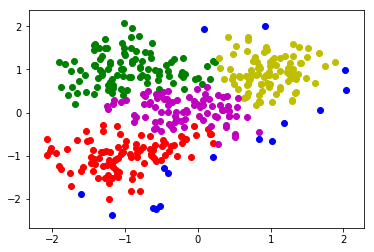

In [53]:
def DBSCAN(epsilon, m, data):
    n = len(data)
    density_objects = np.array([False] * n)
    for i in range(n):
        k = 0
        for j in range(n):
            if i != j and np.linalg.norm(data[i] - data[j]) < epsilon:
                k += 1
        if k >= m:
            density_objects[i] = True
    classes = np.array([-1] * n)
    cl = 0
    for i in range(n):
        if density_objects[i] and classes[i] == -1:
            for j in range(n):
                if density_objects[j] and \
                    np.linalg.norm(data[i] - data[j]) < epsilon:
                    classes[j] = cl
            cl += 1
        elif density_objects[i] and classes[i] != -1:
            for j in range(n):
                if density_objects[j] and \
                    np.linalg.norm(data[i] - data[j]) < epsilon:
                    classes[j] = classes[i]
    for i in range(cl):
        for j in range(n):
            if classes[j] == i:
                point = data[j]
                k = 0
                for l in range(n):
                    if l != j and classes[l] == classes[j] \
                        and np.linalg.norm(point - data[l]) < epsilon:
                        k += 1
                if k < m:
                    classes[j] = -1
    return classes

    
    
path = "/Users/user/PycharmProjects/MLHW1/blobs.csv"
data = np.array(pd.read_csv(path))
classes = DBSCAN(0.5, 5, data)
uniq_classes = np.unique(classes)
print (len(uniq_classes))
print("epsilon = 0.5")
print ("m = 5")
print ()
fig = plt.figure()
k = 0
centers = []
for cl in uniq_classes:
    q = 1
    sum = np.array([0, 0])
    for i in range(len(classes)):
        if classes[i] == cl:
            q += 1
            sum = sum + data[i]
    centers.append((1 / q * sum, cl))
print ("Dunn index = ", Dunn(classes, centers, data))
for cl in uniq_classes:
    for i in range(len(classes)):
        if cl == classes[i]:
            plt.scatter(data[i][0], data[i][1], color=colors[k])
    k += 1
plt.show()

Задание 3

Quantity of clusters:  5


Dunn index:  0.2722114411931538


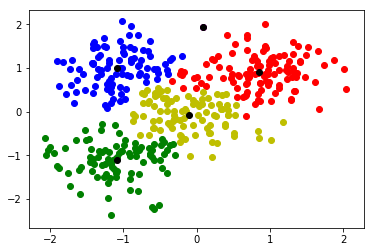

Quantity of clusters:  4


Dunn index:  0.2902554686636175


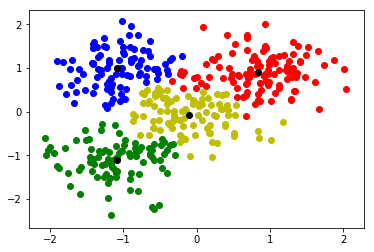

Quantity of clusters:  3


Dunn index:  0.33866772340614926


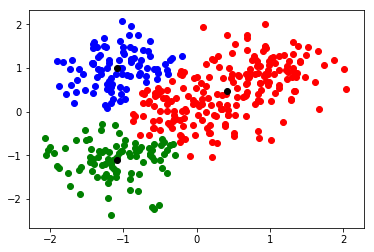

Quantity of clusters:  2


Dunn index:  0.4303967124890829


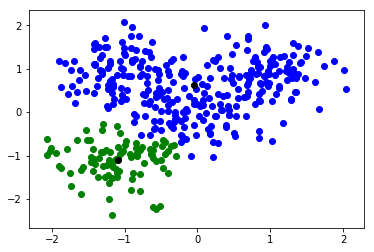

In [49]:
def AglomerativeClustering(data, k):
    n = len(data)
    classes = np.array([0] * n)
    centers = []
    quantities = []
    uniq_classes = []
    for i in range(n):
        classes[i] = i
        centers.append(data[i])
        quantities.append(1)
        uniq_classes.append(i)
    distances = np.zeros((n, n))
    for i in range(n):
            for j in range(n):
                distances[i][j] = np.linalg.norm(centers[i] - centers[j])
    while len(uniq_classes) > k:
        m = len(uniq_classes)        
        minimum = np.linalg.norm(centers[0] - centers[1])
        i_ind = 0
        j_ind = 1
        for i in range(m):
            for j in range(m):
                if distances[i][j] < minimum and i != j:
                    minimum = distances[i][j]
                    i_ind = i
                    j_ind = j
        for i in range(n):
            if classes[i] == uniq_classes[max(i_ind, j_ind)]:
                classes[i] = uniq_classes[min(i_ind, j_ind)]
        new_center = 1 / (quantities[i_ind] + quantities[j_ind]) * \
                    (quantities[i_ind] * centers[i_ind]
                        + quantities[j_ind] * centers[j_ind])
        d = np.array([0] * m)
        for i in range(m):
            distances[min(i_ind, j_ind)][i] = np.linalg.norm(new_center - centers[i])
            distances[i][min(i_ind, j_ind)] = np.linalg.norm(new_center - centers[i])
        centers[min(i_ind, j_ind)] = new_center
        quantities[min(j_ind, i_ind)] += quantities[max(i_ind, j_ind)]
        centers.pop(max(i_ind, j_ind))
        quantities.pop(max(i_ind, j_ind))
        uniq_classes.pop(max(i_ind, j_ind))
        distances = np.delete(distances, max(i_ind, j_ind), axis=0)
        distances = np.delete(distances, max(i_ind, j_ind), axis=1)
    return classes, centers, uniq_classes   
    

path = "/Users/user/PycharmProjects/MLHW1/blobs.csv"
data = np.array(pd.read_csv(path))
print("Metrics - distance between centers")
for l in range(5, 1, -1):
    print ("Quantity of clusters: ", l)
    d, centers, unique_classes = AglomerativeClustering(data, l)
    modified_centers = []
    for i in range(len(centers)):
        modified_centers.append((centers[i], unique_classes[i]))
    print ("Dunn index: ", Dunn(classes, modified_centers, data))
    uniq_classes = np.unique(d)
    fig = plt.figure()
    colors = ['b', 'g', 'r', 'y', 'm']
    for j in range(len(uniq_classes)):
        for i in range(len(d)):
            if d[i] == uniq_classes[j]:
                plt.scatter(data[i][0], data[i][1], color=colors[j])
        plt.scatter(centers[j][0], centers[j][1], color='k')
    plt.show()